<a href="https://colab.research.google.com/github/JauraSeerat/StockPrediction/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
1. import dependencies
2. install yahoo finace data

In [1]:
# import dependencies
#for data formatting
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

#import data from yahoo finance
df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.727715
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275


In [2]:
# taking the average of Adj Close
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(close_px)


Date
2010-01-04     26.681330
2010-01-05     26.727465
2010-01-06     26.302330
2010-01-07     26.253704
2010-01-08     26.428249
2010-01-11     26.195114
2010-01-12     25.897146
2010-01-13     26.262434
2010-01-14     26.110340
2010-01-15     25.673977
2010-01-19     26.809748
2010-01-20     26.397085
2010-01-21     25.940775
2010-01-22     24.654148
2010-01-25     25.317411
2010-01-26     25.675222
2010-01-27     25.917091
2010-01-28     24.846146
2010-01-29     23.944765
2010-02-01     24.277634
2010-02-02     24.418516
2010-02-03     24.838663
2010-02-04     23.943514
2010-02-05     24.368649
2010-02-08     24.201584
2010-02-09     24.459652
2010-02-10     24.326265
2010-02-11     24.768839
2010-02-12     24.982042
2010-02-16     25.358553
                 ...    
2016-11-29    106.793365
2016-11-30    105.892700
2016-12-01    104.905830
2016-12-02    105.298676
2016-12-05    104.541748
2016-12-06    105.346558
2016-12-07    106.381355
2016-12-08    107.425720
2016-12-09    109.17

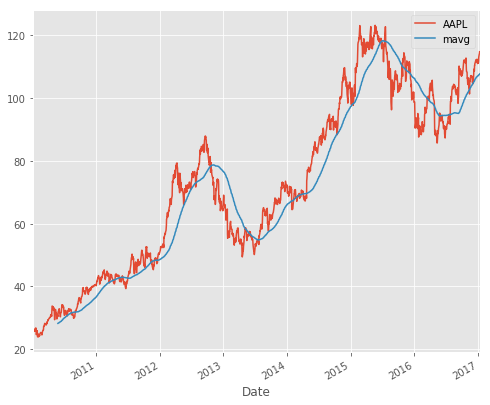

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#adjust the size of matplotlib
import matplotlib as mpl
mpl.rc('figure',figsize=(8,7))
mpl.__version__


# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

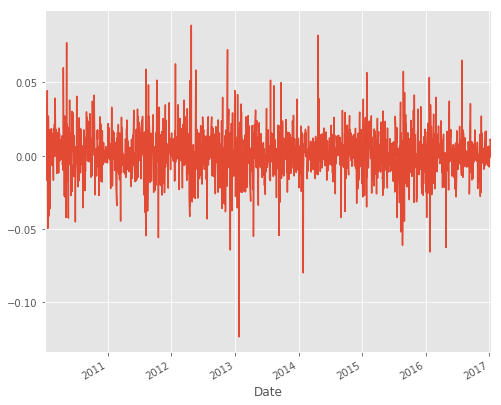

In [4]:
# calculate returns
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

**Analysing Competitor Stock**

In [5]:
df_comp = web.DataReader(['AAPL','GE','GOOG','IBM','MSFT'],'yahoo',start=start,end=end)['Adj Close']
df_comp.tail() #this will return the table of closing prices among the stock prices from Yahoo Finance

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-05,111.727715,27.941267,794.020020,150.013260,59.230362
2017-01-06,112.973305,28.021051,806.150024,150.751312,59.743763
2017-01-09,114.008080,27.888081,806.650024,149.079559,59.553616
2017-01-10,114.123047,27.808300,804.789978,147.185501,59.534603
2017-01-11,114.736275,27.896944,807.909973,149.168472,60.076519


In [6]:
retscomp = df_comp.pct_change() #Percentage change between the current and a prior element.
corr = retscomp.corr() #compute pairwise correlation 
corr.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.381450,0.411693,0.383840,0.393467
GE,0.381450,1.000000,0.422249,0.535167,0.474091
GOOG,0.411693,0.422249,1.000000,0.403014,0.472083
IBM,0.383840,0.535167,0.403014,1.000000,0.496674
MSFT,0.393467,0.474091,0.472083,0.496674,1.000000


Text(0, 0.5, 'GOOG Returns')

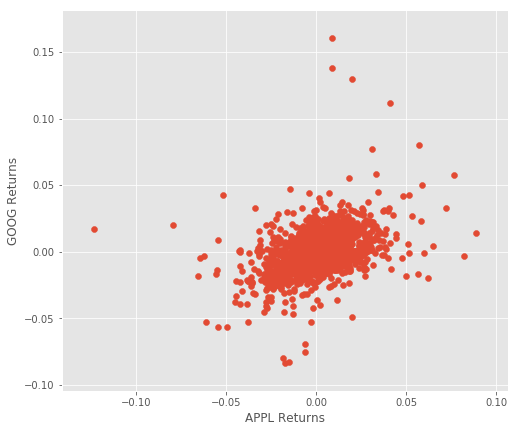

In [7]:
# plot the Apple and GE with ScatterPlot to view the return distributions

plt.scatter(retscomp.AAPL,retscomp.GOOG)
plt.xlabel('APPL Returns')
plt.ylabel('GOOG Returns')

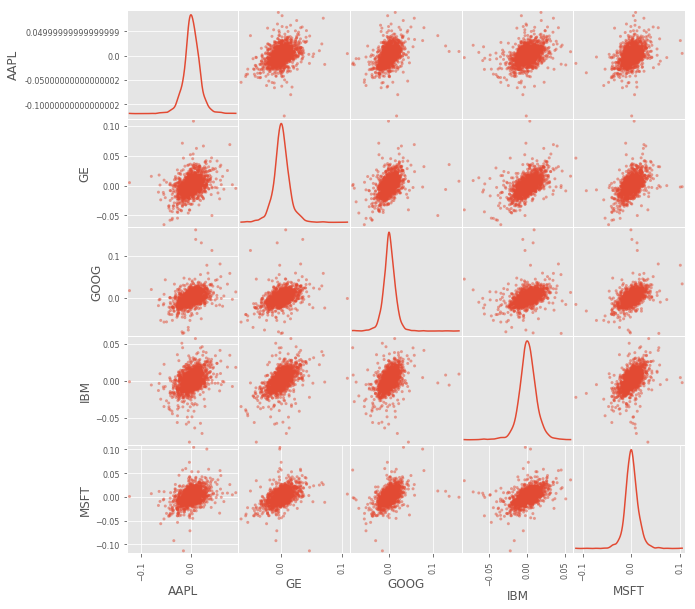

In [8]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

([<matplotlib.axis.YTick at 0x7f81e054d518>,
 <a list of 5 Text yticklabel objects>)

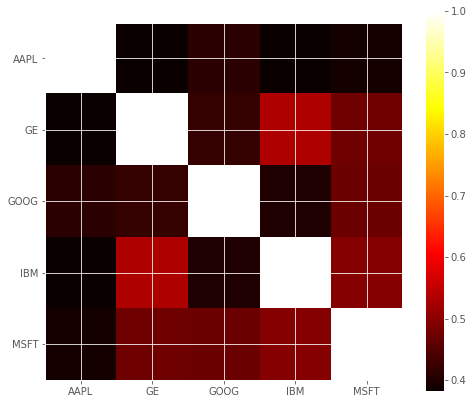

In [9]:
# visualize the correlations ranges among the competitor stocks. 
# lighter color means the two stocks are correlated

plt.imshow(corr, cmap= 'hot',interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

from the scatter matrix and heatmap, we can find good correlation among competing stocks


**Stock Return Rate and Risk**

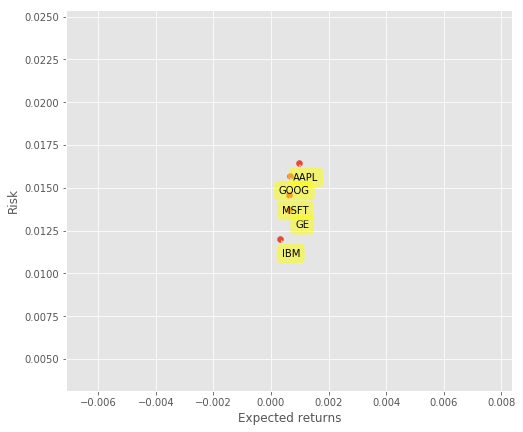

In [0]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


**Prediction of Stock Prices**

we will use 3 machine learning models to predict our stocks:
* Simple Linear Analysis
* Quadractic Discriminator Analysis
* K Nearest Neighbour (KNN)

In [0]:
#feature engineering
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low'] ) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

Pre-Processing and Cross Validation
* Drop missing values
* Separating the labels here, we want to predict the Adj Close
* Scale the X so that everyone can have the same distribution of linear regression
* Scale the X so that everyone can have same distribution for linear regression
* Finally We want to find late X and early X for model generation and evaluation
* separate labels and identify it as y
* separation of training and testing of model by crossing validation train test split

In [0]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# drop missing values
dfreg.fillna(value=-99999, inplace= True)

# separate data
forecast_out = int(math.ceil(0.01*len(dfreg)))

# separate the labels heere
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
x= np.array(dfreg.drop(['label'],1))


# scale X
X = preprocessing.scale(x)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]


# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [0]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [0]:
# Model Prediction

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [41]:
#Linear Regression
clfreg= LinearRegression(n_jobs= -1)
clfreg.fit(X_train, y_train)

#Quadratic Regression
clfpoly2 = make_pipeline(PolynomialFeatures(2),Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [42]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [0]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [44]:
print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.9692699826609007
The quadratic regression 2 confidence is  0.9700569465283199
The quadratic regression 3 confidence is  0.9691984772438904
The knn regression confidence is  0.9501958636894687


In [0]:
# printing the forecast
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

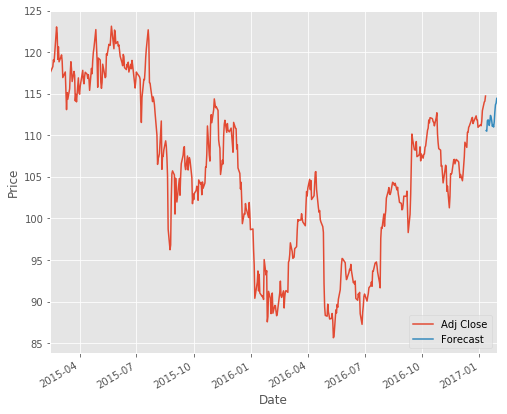

In [48]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()